# Wine Quality Prediction
Este notebook demonstra como treinar uma rede neural MLP para prever a qualidade de vinhos.

In [ ]:
%cd /content
!git clone https://github.com/cadusouza2001/vinho.git
%cd vinho
!pip install -q pandas scikit-learn tensorflow matplotlib

/content
Cloning into 'vinho'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 30 (delta 12), reused 24 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 101.74 KiB | 766.00 KiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/vinho


## 1. Carregamento dos Dados
Aqui carregamos os CSVs e unimos os dados de vinho tinto e branco.

In [ ]:
import pandas as pd
# # Leitura dos dois arquivos CSV de vinho tinto e branco
# red = pd.read_csv('winequality-red.csv', sep=';')
# white = pd.read_csv('winequality-white.csv', sep=';')
# # Unimos os DataFrames em um único conjunto de dados
# data = pd.concat([red, white], ignore_index=True)
# data.head()

# --- Carregamento e Mapeamento de Classes ---
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

# Add a 'type' feature: 0 for red, 1 for white
red['type'] = 0
white['type'] = 1

data = pd.concat([red, white], ignore_index=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


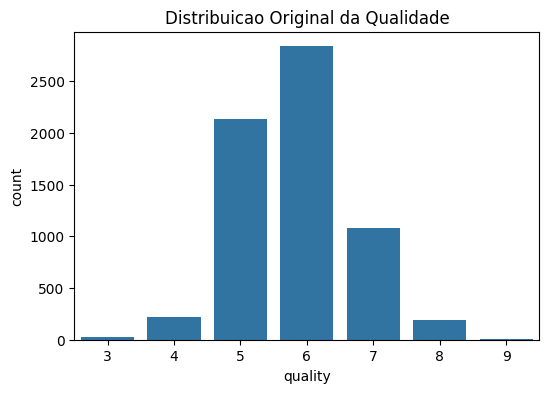

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=data)
plt.title('Distribuicao Original da Qualidade')
plt.show()

### Conceitos
- **Aprendizado supervisionado**: usamos exemplos rotulados (qualidade) para treinar o modelo.
- **Classificação multiclasse**: a variável alvo possui três classes (baixa, média e alta qualidade).

## 2. Pré-processamento

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# data['quality'] = data['quality'].apply(lambda q: 0 if q <= 5 else (1 if q == 6 else 2))
# data['quality'] = data['quality'].apply(lambda q: 1 if q >= 7 else 0)

# --- Separação de Features e Rótulos ---
X = data.drop('quality', axis=1)
y = data['quality']

# --- Padronização dos Dados ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Divisão em Treino, Validação e Teste ---
# 1. Primeiro, separamos o conjunto de Teste final (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Depois, separamos o conjunto de Treino e Validação (do restante)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# # --- Aplicação do SMOTE (somente no conjunto de treino) ---
# print("Distribuição do treino ANTES do SMOTE:", np.bincount(y_train))
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# print("Distribuição do treino DEPOIS do SMOTE:", np.bincount(y_train_resampled))

In [ ]:
# plt.figure(figsize=(6,4))
# sns.countplot(x=y)
# plt.title('Distribu\u00e7\u00e3o das Classes (0=baixa,1=m\u00e9dia,2=alta)')
# plt.show()

### Conceitos
- **Normalização**: ajuda o treinamento do MLP.
- **Divisão treino/teste**: parte dos dados é reservada para avaliar o modelo.

## 3. Construção do Modelo

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0188 - mae: 0.0897 - val_loss: 0.0027 - val_mae: 0.0390
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0016 - val_mae: 0.0301
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mae: 0.0267 - val_loss: 0.0011 - val_mae: 0.0251
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6296e-04 - mae: 0.0212 - val_loss: 8.5442e-04 - val_mae: 0.0216
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5995e-04 - mae: 0.0183 - val_loss: 7.0178e-04 - val_mae: 0.0199
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4916e-04 - mae: 0.0165 - val_loss: 5.3279e-04 - val_mae: 0.0171
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8450e-04 - mae: 0.0150 - val_loss: 4.4612e-04 - val_mae: 0.0157
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1892e-04 - mae: 0.0138 - val_loss: 3.9565e-04 - val_mae: 0.0146
Epoch 9/100
130/130 

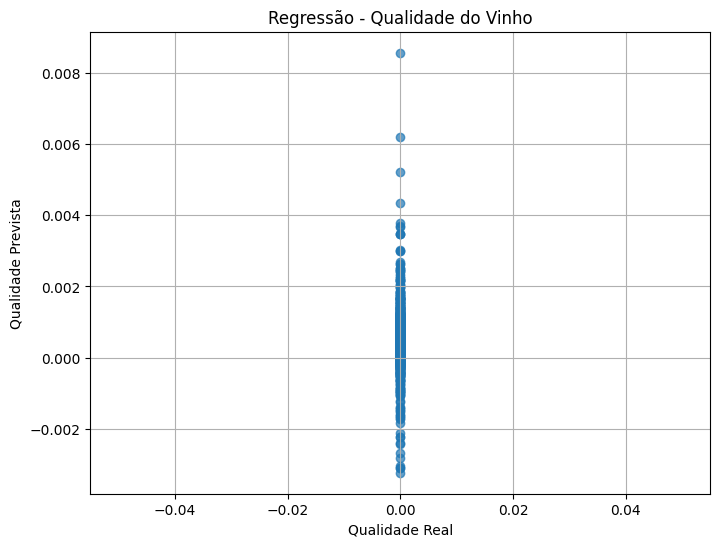

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# --- Compilação do modelo ---
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# --- Treinamento do modelo ---
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# --- Avaliação no conjunto de teste ---
y_pred = model.predict(X_test).flatten()
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# --- Visualização: reais vs previstos ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Qualidade Real")
plt.ylabel("Qualidade Prevista")
plt.title("Regressão - Qualidade do Vinho")
plt.grid(True)
plt.show()



In [ ]:
y_pred_rounded = np.rint(y_pred).astype(int)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_rounded)
print("Acurácia (previsão de classe após arredondar):", acc)

Acurácia (previsão de classe após arredondar): 1.0


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(3340), np.int64(1): np.int64(817)}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
# Definição da arquitetura MLP com Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3), # Adjusted dropout rate
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2), # Adjusted dropout rate
    # The output layer now has 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])


# Compilação define otimizador, perda e métrica

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 384 (1.50 KB)

### Conceitos
- **Camadas e neurônios**: MLP com camadas densas.
- **Função de ativação**: usamos ReLU e softmax.
- **Dropout**: ajuda a reduzir overfitting.

## 4. Treinamento

In [ ]:
# Treinamento da rede com EarlyStopping para evitar overfitting

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6, verbose=1)
callbacks = [lr_reduction, early_stop]


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    X_train_resampled, y_train_resampled, # Use the data from SMOTE
    epochs=100,
    batch_size=128, # Increased batch size for more stable training
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    class_weight=class_weights
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7707 - loss: 0.6720 - val_accuracy: 0.6683 - val_loss: 0.7171 - learning_rate: 1.0000e-06
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7766 - loss: 0.6602 - val_accuracy: 0.6865 - val_loss: 0.6402 - learning_rate: 1.0000e-06
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7705 - loss: 0.6684 - val_accuracy: 0.6942 - val_loss: 0.6076 - learning_rate: 1.0000e-06
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7727 - loss: 0.6648 - val_accuracy: 0.6981 - val_loss: 0.5919 - learning_rate: 1.0000e-06
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7668 - loss: 0.6879 - val_accuracy: 0.7000 - val_loss: 0.5870 - learning_rate: 1.0000e-06
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7673 - loss: 0.6761 - val_accuracy: 0.7010 - val_loss: 0.5811 - learning_rate: 1.0000e-06
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7598 

### Conceitos
- **EarlyStopping**: interrompe o treinamento quando a validação não melhora, prevenindo overfitting.


## 5. Avaliação

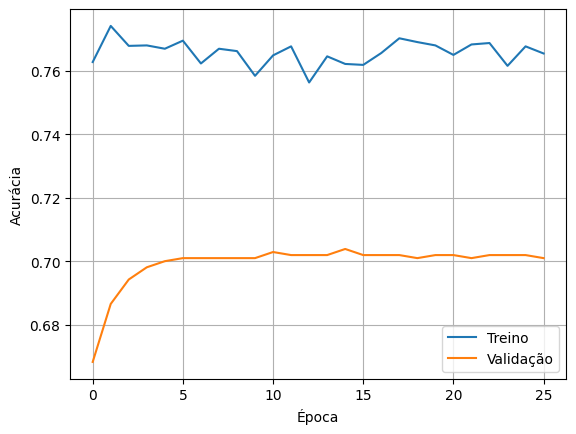

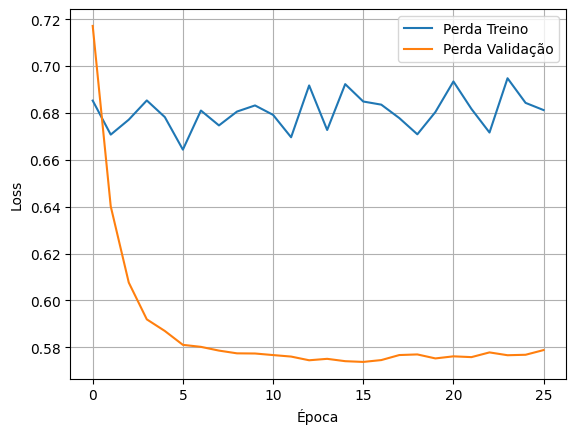

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.5591
Acurácia final de validação: 0.7019


In [ ]:
# Avaliação final no conjunto de teste
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

loss, acc = model.evaluate(X_val, y_val)
print(f"Acurácia final de validação: {acc:.4f}")

### Conceitos
- **Crossentropy** como função de custo.
- **Acurácia** como métrica de desempenho.
- **Overfitting** monitorado via validação.

## 6. Matriz de Confusão

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


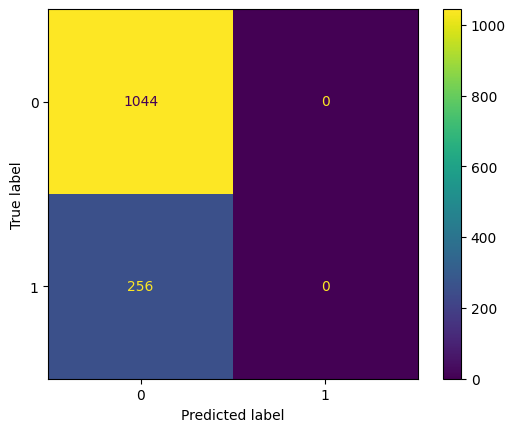

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1044
           1       0.00      0.00      0.00       256

    accuracy                           0.80      1300
   macro avg       0.40      0.50      0.45      1300
weighted avg       0.64      0.80      0.72      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Predi\u00e7\u00e3o no teste e visualiza\u00e7\u00e3o da matriz de confus\u00e3o
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

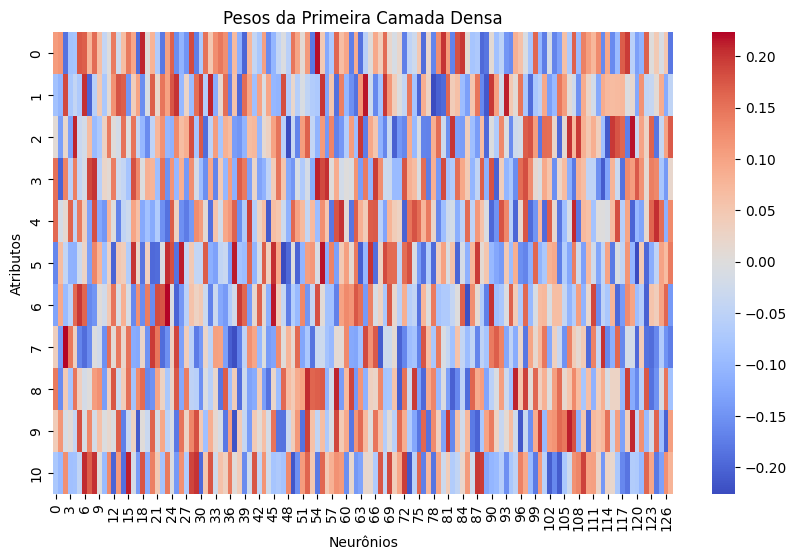

In [ ]:
weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10,6))
sns.heatmap(weights, cmap='coolwarm')
plt.title('Pesos da Primeira Camada Densa')
plt.xlabel('Neur\u00f4nios')
plt.ylabel('Atributos')
plt.show()

In [ ]:
import random
import numpy as np

# Número de amostras aleatórias que você quer testar
num_samples = 5

# Pega 5 índices aleatórios e únicos do conjunto de teste
# O range vai de 0 até o tamanho do seu X_test
try:
    random_indices = random.sample(range(len(X_test)), num_samples)
except ValueError:
    print("O número de amostras é maior que o conjunto de teste.")
    random_indices = []


# Faz um loop por esses índices aleatórios
for i in random_indices:
    # A saída do modelo é a probabilidade da classe 1
    prob_class_1 = model.predict(X_test[i:i+1])[0][0]

    # Decidimos a classe com base no limiar de 0.5 (ou o limiar otimizado que você escolheu)
    pred = 1 if prob_class_1 > 0.5 else 0

    # Imprimimos a probabilidade da classe prevista
    prob_predita = prob_class_1 if pred == 1 else (1 - prob_class_1)

    print(f'Exemplo Aleatório (índice {i}): real={y_test[i]} | predito={pred} | prob_classe_1={prob_class_1:.3f} | prob_predita={prob_predita:.3f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Exemplo Aleatório (índice 341): real=0 | predito=0 | prob_classe_1=0.011 | prob_predita=0.989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Exemplo Aleatório (índice 478): real=0 | predito=0 | prob_classe_1=0.255 | prob_predita=0.745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Exemplo Aleatório (índice 880): real=0 | predito=0 | prob_classe_1=0.079 | prob_predita=0.921
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Exemplo Aleatório (índice 375): real=0 | predito=0 | prob_classe_1=0.352 | prob_predita=0.648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Exemplo Aleatório (índice 32): real=0 | predito=0 | prob_classe_1=0.458 | prob_predita=0.542


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Resultados com Limiar (Threshold) = 0.7

Relatório de Classificação:
                       precision    recall  f1-score   support

Classe 0 (Ruim/Médio)       0.84      0.97      0.90      1044
       Classe 1 (Bom)       0.69      0.25      0.37       256

             accuracy                           0.83      1300
            macro avg       0.76      0.61      0.63      1300
         weighted avg       0.81      0.83      0.80      1300


Matriz de Confusão:


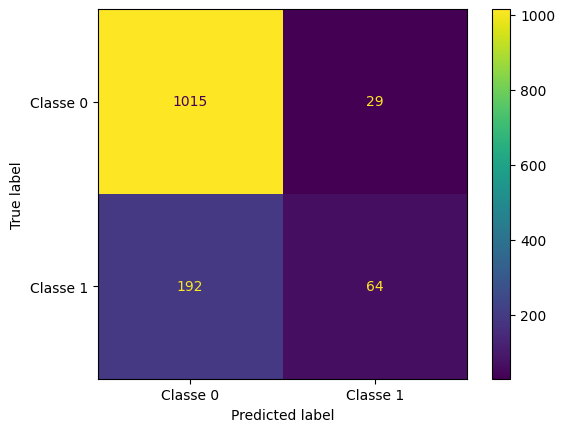

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Fazer previsões em todo o conjunto de teste (isso só precisa ser feito uma vez)
y_probs = model.predict(X_test)

# --- EXPERIMENTE MUDAR ESTE VALOR ---
THRESHOLD = 0.7

# Aplica o novo limiar para decidir a classe
y_pred = (y_probs > THRESHOLD).astype("int32")

# 1. Relatório de Classificação
print(f"Resultados com Limiar (Threshold) = {THRESHOLD}\n")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Classe 0 (Ruim/Médio)', 'Classe 1 (Bom)']))

# 2. Matriz de Confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot()
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


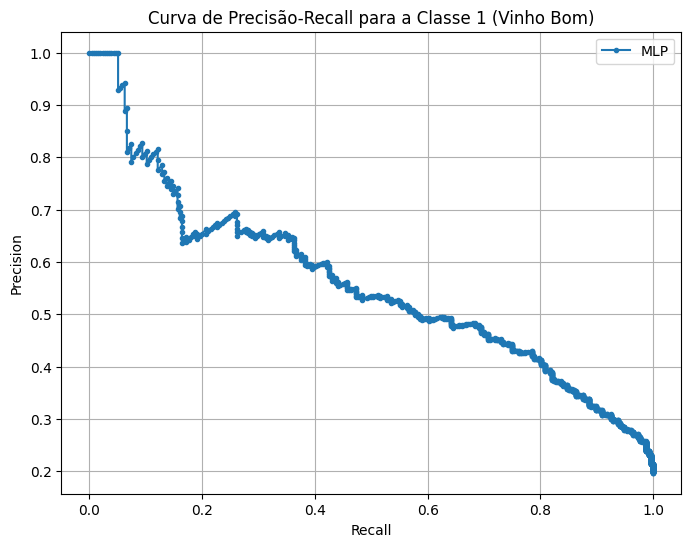

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Pega as probabilidades da classe positiva (classe 1)
y_probs_positive = model.predict(X_test)

# Calcula precisão, recall e limiares
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_positive)

# Plota a curva
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão-Recall para a Classe 1 (Vinho Bom)')
plt.legend()
plt.grid(True)
plt.show()